In [1]:
# 한 수준의 계층 구조
import pandas as pd
df = pd.DataFrame({
    'Name': ['A', 'B', 'C', 'D', 'E', 'F'],
    'Value': [10, 2, 23, 87, 12, 65]
})
df

,Name,Value
0,A,10
1,B,2
2,C,23
3,D,87
4,E,12
5,F,65


In [4]:
# 서클 패킹 알고리즘
#! pip install circlify
import circlify

circles = circlify.circlify(
    df['Value'].tolist(),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)
circles

[Circle(x=-0.44578608966292743, y=0.537367020215489, r=0.08132507760370634, level=1, ex={'datum': 2}),
 Circle(x=0.3494777859633366, y=0.7090955337283429, r=0.18184840179733308, level=1, ex={'datum': 10}),
 Circle(x=-0.08724389934418225, y=-0.48746607592300867, r=0.1992049434213246, level=1, ex={'datum': 12}),
 Circle(x=-0.09281533731572514, y=0.5915934875798542, r=0.27578675610580333, level=1, ex={'datum': 23}),
 Circle(x=-0.5363757253598688, y=0.0, r=0.46362427464013123, level=1, ex={'datum': 65}),
 Circle(x=0.46362427464013123, y=0.0, r=0.5363757253598688, level=1, ex={'datum': 87})]

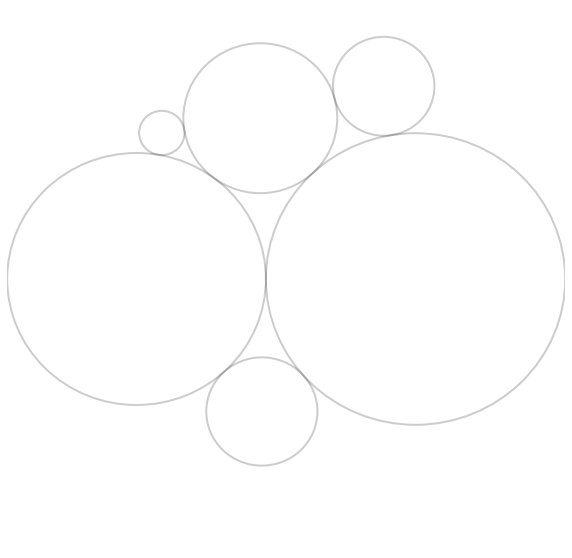

In [7]:
# 기본 차트
import circlify
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ax.axis('off')

lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)

plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for circle in circles:
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2, fill=False))

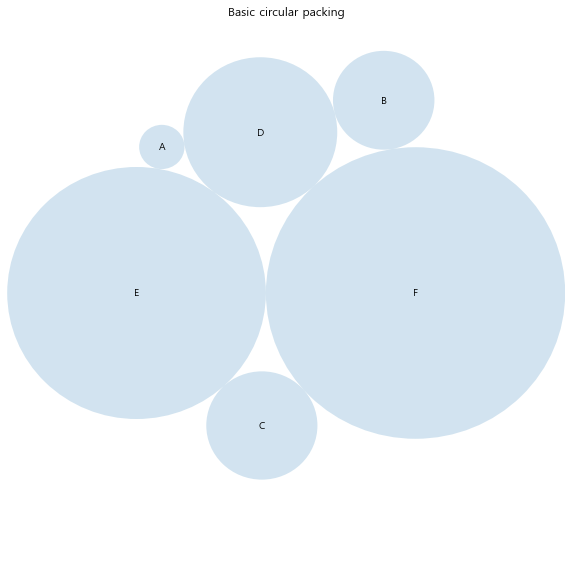

In [8]:
# 시각적 조정
import circlify
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ax.set_title('Basic circular packing')

ax.axis('off')

lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

labels = df['Name']         # 레이블 설정

for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2))
    plt.annotate(
          label,
          (x,y ) ,
          va='center',
          ha='center'
     )

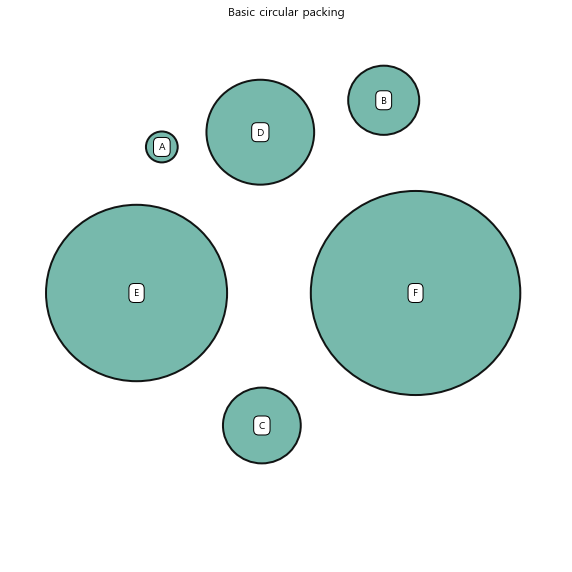

In [11]:
# 시각적 조정
import circlify
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ax.set_title('Basic circular packing')

ax.axis('off')

lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

labels = df['Name']         # 레이블 설정

for circle, label in zip(circles, labels):
      x, y, r = circle
      ax.add_patch(plt.Circle((x, y), r*0.7, alpha=0.9, linewidth=2, facecolor="#69b2a3", edgecolor="black"))
      plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

In [12]:
# 다단계 계층이 있는 원형 패킹 차트
data = [{'id': 'World', 'datum': 6964195249, 'children' : [
              {'id' : "North America", 'datum': 450448697,
                   'children' : [
                     {'id' : "United States", 'datum' : 308865000},
                     {'id' : "Mexico", 'datum' : 107550697},
                     {'id' : "Canada", 'datum' : 34033000} 
                   ]},
              {'id' : "South America", 'datum' : 278095425, 
                   'children' : [
                     {'id' : "Brazil", 'datum' : 192612000},
                     {'id' : "Colombia", 'datum' : 45349000},
                     {'id' : "Argentina", 'datum' : 40134425}
                   ]},
              {'id' : "Europe", 'datum' : 209246682,  
                   'children' : [
                     {'id' : "Germany", 'datum' : 81757600},
                     {'id' : "France", 'datum' : 65447374},
                     {'id' : "United Kingdom", 'datum' : 62041708}
                   ]},
              {'id' : "Africa", 'datum' : 311929000,  
                   'children' : [
                     {'id' : "Nigeria", 'datum' : 154729000},
                     {'id' : "Ethiopia", 'datum' : 79221000},
                     {'id' : "Egypt", 'datum' : 77979000}
                   ]},
              {'id' : "Asia", 'datum' : 2745929500,  
                   'children' : [
                     {'id' : "China", 'datum' : 1336335000},
                     {'id' : "India", 'datum' : 1178225000},
                     {'id' : "Indonesia", 'datum' : 231369500}
                   ]}
    ]}]
data

[{'id': 'World',
  'datum': 6964195249,
  'children': [{'id': 'North America',
    'datum': 450448697,
    'children': [{'id': 'United States', 'datum': 308865000},
     {'id': 'Mexico', 'datum': 107550697},
     {'id': 'Canada', 'datum': 34033000}]},
   {'id': 'South America',
    'datum': 278095425,
    'children': [{'id': 'Brazil', 'datum': 192612000},
     {'id': 'Colombia', 'datum': 45349000},
     {'id': 'Argentina', 'datum': 40134425}]},
   {'id': 'Europe',
    'datum': 209246682,
    'children': [{'id': 'Germany', 'datum': 81757600},
     {'id': 'France', 'datum': 65447374},
     {'id': 'United Kingdom', 'datum': 62041708}]},
   {'id': 'Africa',
    'datum': 311929000,
    'children': [{'id': 'Nigeria', 'datum': 154729000},
     {'id': 'Ethiopia', 'datum': 79221000},
     {'id': 'Egypt', 'datum': 77979000}]},
   {'id': 'Asia',
    'datum': 2745929500,
    'children': [{'id': 'China', 'datum': 1336335000},
     {'id': 'India', 'datum': 1178225000},
     {'id': 'Indonesia', 'datu

In [13]:
# 원위치 계산
import circlify

circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

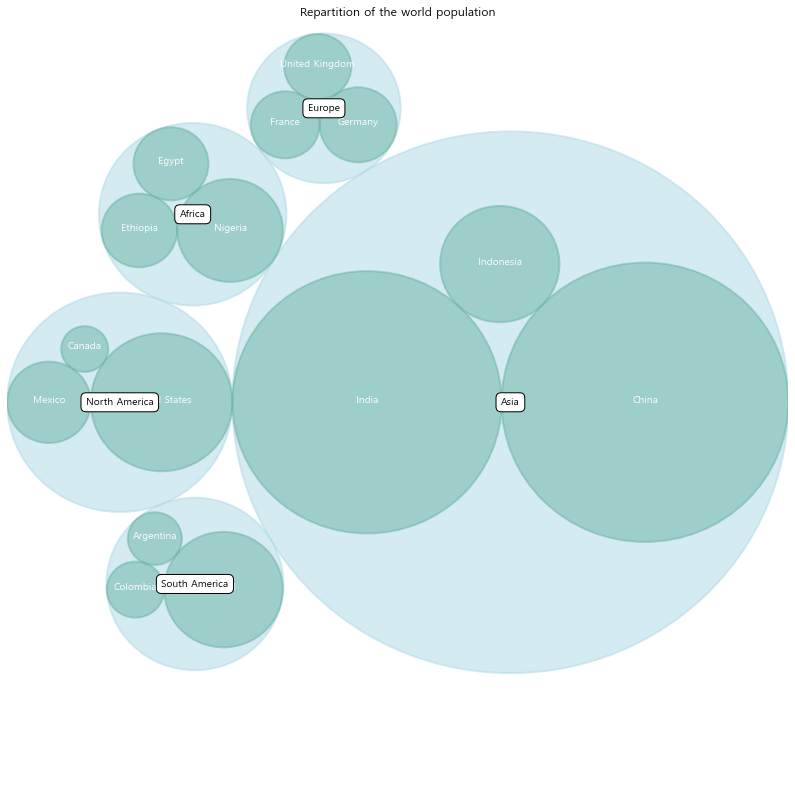

In [16]:
import circlify
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,14))

ax.set_title('Repartition of the world population')

ax.axis('off')

lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# 작은 원
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

# 큰 원
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x,y ), ha='center', color="white")

# 계층에 대한 주석
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))